# 1.4 Plots and Summaries

Knowing the mean, standard deviation, median and interquartile range of a dataset gives us some information about what its histogram might look like. The summaries give us a language to describe characteristic properties of histograms.

## 1.4.1 Some Properties of Histograms

### Tails and Modes

The **tails** of a histogram are the relatively uncommon values that are significantly larger (resp. smaller) than the value at the peak (which is sometimes called the **mode**).

A histogram is **unimodal** if there is only one peak; if there are more than one, it is **multimodal**, with the special term **bimodal** sometimes being used for the case where there are two peaks.

### Skewness

The histograms we have seen have been relatively **symmetric**, where the left and right tails are about as long as one another. Not all data is symmetric. In some datasets, one or another tail is longer. This effect is called **skew**.

**Skew appears often in real data.** For example, consider a dataset of citations to faculty publications. Generally, a small number of papers get many citations, and many papers get few citations. These histograms are very different from, say, body temperature pictures.

#### Right-Skewed Data

In **right-skewed** (or positively skewed) data:
- There are many small data items
- A small number of data items are large
- The right tail is longer
- Mean > Median

**Common causes**:
- Income data (always positive, but can be very large)
- Citation counts
- Website traffic
- Constrained minimums

#### Left-Skewed Data

In **left-skewed** (or negatively skewed) data:
- There are many large data items
- Some data items are small
- The left tail is longer
- Mean < Median

**Common causes**:
- Test scores with ceiling effects
- Birth weights (obstetrical practice prevents very large babies)
- Age at death (in developed countries)

### Checking for Skewness

**Method 1**: Look at the histogram

**Method 2**: Compare mean and median
- If mean >> median: likely right-skewed
- If mean << median: likely left-skewed
- If mean ≈ median: likely symmetric

Mean: 1.95
Median: 1.37


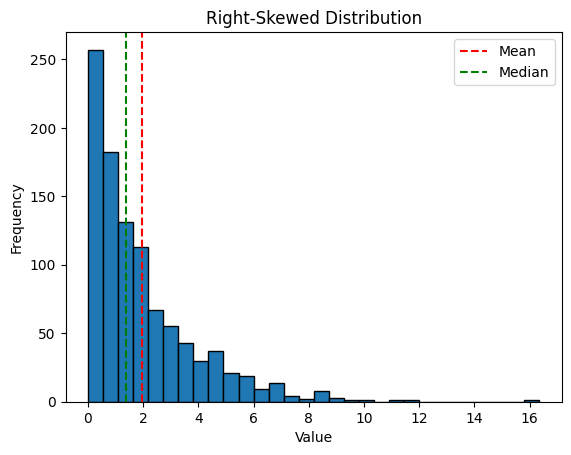

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Right-skewed data (income-like)
np.random.seed(42)
right_skewed = np.random.exponential(scale=2, size=1000)

print(f"Mean: {np.mean(right_skewed):.2f}")
print(f"Median: {np.median(right_skewed):.2f}")

plt.hist(right_skewed, bins=30, edgecolor='black')
plt.title('Right-Skewed Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.axvline(np.mean(right_skewed), color='r', linestyle='--', label='Mean')
plt.axvline(np.median(right_skewed), color='g', linestyle='--', label='Median')
plt.legend()
plt.show()

In [2]:
import numpy as np

# Example data
data = np.array([165, 170, 168, 172, 180, 175, 169, 173, 177, 171])

# Compute standard coordinates
mean = np.mean(data)
std = np.std(data)
z_scores = (data - mean) / std

print(f"Original data - Mean: {mean:.2f}, Std: {std:.2f}")
print(f"Z-scores - Mean: {np.mean(z_scores):.10f}, Std: {np.std(z_scores):.10f}")
print(f"Z-scores: {z_scores}")

Original data - Mean: 172.00, Std: 4.22
Z-scores - Mean: -0.0000000000, Std: 1.0000000000
Z-scores: [-1.65915912 -0.47404546 -0.94809093  0.          1.89618185  0.71106819
 -0.71106819  0.23702273  1.18511366 -0.23702273]


### Normal Data

An extremely important fact about data is that **for many kinds of data, histograms of standard coordinates look the same**. Many completely different datasets produce a histogram that, in standard coordinates, has a very specific appearance:
- It is symmetric and unimodal
- It looks like a "bell curve"

```{figure} images/fig_1_4_standard_normal.png
:name: fig-standard-normal
:width: 80%

The standard normal curve. Many different datasets (oyster volumes, human heights, human weights) have histograms that closely approximate this shape when plotted in standard coordinates.


**Definition: Standard Normal Data**

Data is **standard normal data** if, when we have a great deal of data, the histogram of the data in standard coordinates is a close approximation to the standard normal curve:

$$y(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}$$

**Definition: Normal Data**

Data is **normal data** if, when we subtract the mean and divide by the standard deviation (i.e., compute standard coordinates), it becomes standard normal data.

### Properties of Normal Data

If we normalize normal data, its histogram will be close to the standard normal curve. This means:

1. The data is **not significantly skewed**
2. About **68%** of the data lie within one standard deviation of the mean
3. About **95%** of the data lie within two standard deviations of the mean
4. About **99.7%** of the data lie within three standard deviations of the mean

This is sometimes called the **68-95-99.7 rule** or the **empirical rule**.

Within 1 SD: 68.4% (expected: 68%)
Within 2 SD: 95.4% (expected: 95%)
Within 3 SD: 99.7% (expected: 99.7%)


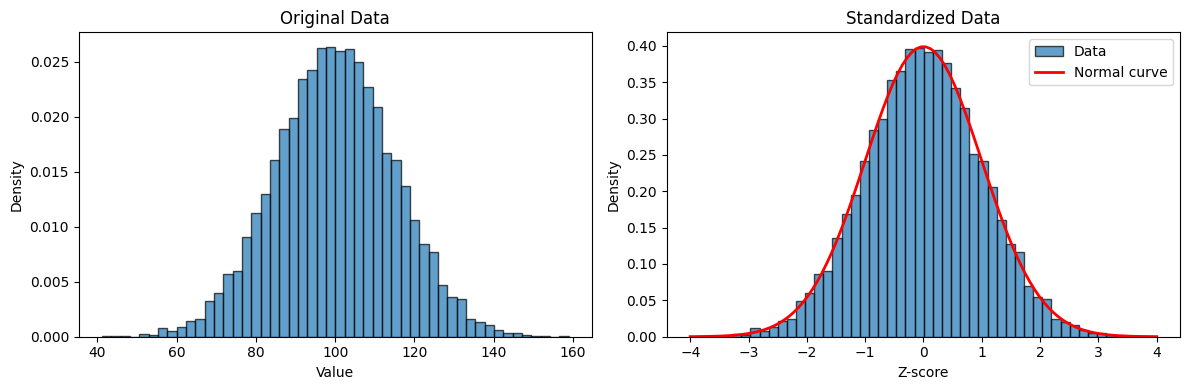

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate normal data
np.random.seed(42)
data = np.random.normal(loc=100, scale=15, size=10000)

# Standardize
z_scores = (data - np.mean(data)) / np.std(data)

# Count data within standard deviations
within_1sd = np.sum(np.abs(z_scores) <= 1) / len(z_scores) * 100
within_2sd = np.sum(np.abs(z_scores) <= 2) / len(z_scores) * 100
within_3sd = np.sum(np.abs(z_scores) <= 3) / len(z_scores) * 100

print(f"Within 1 SD: {within_1sd:.1f}% (expected: 68%)")
print(f"Within 2 SD: {within_2sd:.1f}% (expected: 95%)")
print(f"Within 3 SD: {within_3sd:.1f}% (expected: 99.7%)")

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Original data
ax1.hist(data, bins=50, density=True, alpha=0.7, edgecolor='black')
ax1.set_title('Original Data')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')

# Standardized data with normal curve
ax2.hist(z_scores, bins=50, density=True, alpha=0.7, edgecolor='black', label='Data')
x = np.linspace(-4, 4, 100)
ax2.plot(x, stats.norm.pdf(x), 'r-', linewidth=2, label='Normal curve')
ax2.set_title('Standardized Data')
ax2.set_xlabel('Z-score')
ax2.set_ylabel('Density')
ax2.legend()

plt.tight_layout()
plt.show()

## 1.4.3 Box Plots

It is usually hard to compare multiple histograms by eye. One problem is the amount of space they take up on a plot. A **box plot** is a way to plot data that simplifies comparison.

A box plot displays a dataset as a vertical picture:
1. A vertical box whose height corresponds to the **interquartile range** (IQR)
2. A horizontal line for the **median**
3. **Whiskers** showing the range of non-outlier data
4. Individual marks for **outliers**

### Building a Box Plot

**Step 1**: Plot a box from Q1 to Q3

**Step 2**: Show the median with a horizontal line

**Step 3**: Identify outliers using a rule (commonly: data items > Q3 + 1.5×IQR or < Q1 - 1.5×IQR)

**Step 4**: Plot outliers with a special symbol (e.g., crosses or circles)

**Step 5**: Draw whiskers:
- From Q1 to the smallest non-outlier data item
- From Q3 to the largest non-outlier data item

Example box plots comparing multiple datasets. The rich graphical structure makes it straightforward to compare distributions. Each box shows the median (line), interquartile range (box), and data range (whiskers).


### Creating Box Plots in Python

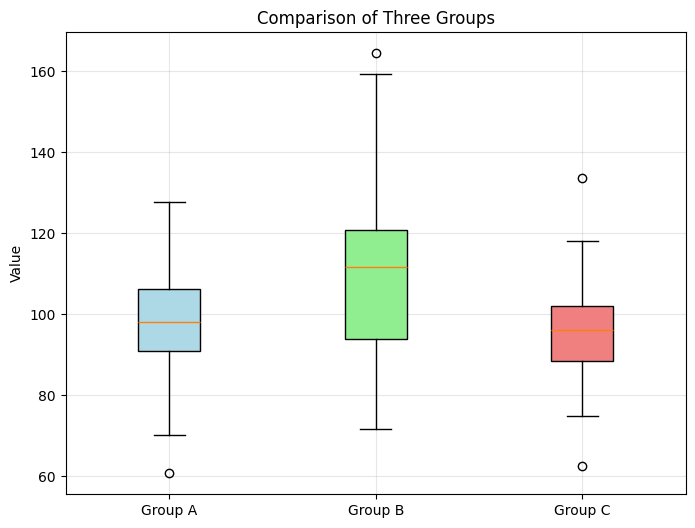


Group A:
  Median: 98.10
  Q1: 90.99
  Q3: 106.09
  IQR: 15.10

Group B:
  Median: 111.68
  Q1: 93.89
  Q3: 120.76
  IQR: 26.88

Group C:
  Median: 95.98
  Q1: 88.45
  Q3: 102.04
  IQR: 13.60


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data for different groups
np.random.seed(42)
group_a = np.random.normal(100, 15, 100)
group_b = np.random.normal(110, 20, 100)
group_c = np.random.normal(95, 10, 100)

# Create box plot
data_to_plot = [group_a, group_b, group_c]

fig, ax = plt.subplots(figsize=(8, 6))
box = ax.boxplot(data_to_plot, tick_labels=['Group A', 'Group B', 'Group C'],
                  patch_artist=True)

# Customize colors
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

ax.set_ylabel('Value')
ax.set_title('Comparison of Three Groups')
ax.grid(True, alpha=0.3)

plt.show()

# Print summary statistics
for i, (data, label) in enumerate(zip(data_to_plot, ['Group A', 'Group B', 'Group C'])):
    print(f"\n{label}:")
    print(f"  Median: {np.median(data):.2f}")
    print(f"  Q1: {np.percentile(data, 25):.2f}")
    print(f"  Q3: {np.percentile(data, 75):.2f}")
    print(f"  IQR: {np.percentile(data, 75) - np.percentile(data, 25):.2f}")

### Interpreting Box Plots

**What to look for**:
1. **Central tendency**: Where is the median line?
2. **Spread**: How tall is the box? How long are the whiskers?
3. **Skewness**: Is the median centered in the box?
4. **Outliers**: Are there many outlier points?
5. **Comparison**: How do multiple groups compare?

{admonition} Key Advantage
:class: tip
Box plots make it easy to compare many datasets simultaneously on one figure, which is difficult with histograms.


## Summary

In this section, we learned:

1. **Histogram properties**:
   - Modes (unimodal, bimodal, multimodal)
   - Skewness (left, right, symmetric)
   - How to identify these features

2. **Standard coordinates**:
   - Normalize data for comparison
   - Mean = 0, Std = 1
   - Reveals underlying distribution shape

3. **Normal data**:
   - Bell-shaped histogram in standard coordinates
   - 68-95-99.7 rule
   - Many real datasets are approximately normal

4. **Box plots**:
   - Compact visual summary
   - Easy comparison of multiple groups
   - Shows median, quartiles, and outliers

These tools help you understand "what's going on" in your data before performing more sophisticated analyses.

## Practice Problems

1. Generate right-skewed and left-skewed data. Verify that mean > median for right-skewed and mean < median for left-skewed.

2. Take any dataset and:
   - Compute z-scores
   - Verify mean(z-scores) = 0 and std(z-scores) = 1
   - Plot histogram of z-scores

3. Generate normal data with mean=50, std=10:
   - Check the 68-95-99.7 rule
   - What percentage falls within 1.5 standard deviations?

4. Create box plots for exam scores from 3 different classes. Identify which class:
   - Has the highest median
   - Has the most spread
   - Has the most outliers

## Next Steps

→ Continue to [Chapter 2: Looking at Relationships](ch02_2d_data.md)

→ Return to [1.3 Summarizing 1D Data](ch01_summarizing.md)